# DeepLabV3+ Transfer Learning Inference Demo

DeepLabV3+ w/ResNet101 backbone transfer learning inference demo
Net pretrained with COCO val2017, then trained with Yamaha-CMU Off-Road Dataset

See: https://pytorch.org/hub/pytorch_vision_deeplabv3_resnet101/

---

Authors:
- **Nate Haddad** haddad[dot]na[at]northeastern[dot]edu
- **Amit Mulay** mulay[dot]am[at]northeastern[dot]edu

In [1]:
import torch
from torchvision import transforms

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from utils import imshow, label_to_color_image, vis_segmentation, display_example_pair, vis_grid_4x3, run_inference

In [2]:
torch.cuda.is_available()

True

In [3]:
np.random.seed(42)

Visualize an example pair from the dataset. We will run inference on this image

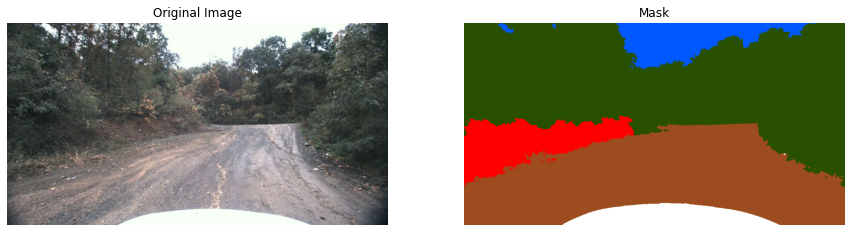

In [4]:
example_image = Image.open('data/yamaha_v0/train/iid000008/rgb.jpg')
example_mask = Image.open('data/yamaha_v0/train/iid000008/labels.png')
image_display = np.array(example_image)
mask_display = np.array(example_mask.convert('RGB'))
display_example_pair(image_display, mask_display)

Load a previously trained model and run the image through it

In [5]:
model = torch.load('models/mobilenet_model_v0.2.pt')
model.eval();

In [6]:
predicted_masks = run_inference(model, example_image)

Finally, we take the orginal example image, and using the segmentation map, a custom color map for our labels, and the label names, overlay the segmentation map and create a key for each of the classes

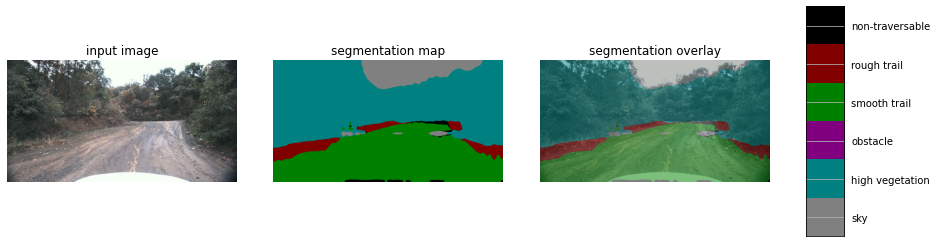

In [7]:
vis_segmentation(example_image, np.array(predicted_masks))

More example output, taken from our paper

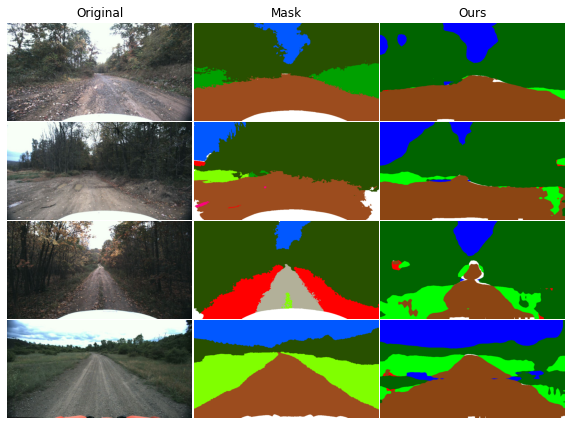

In [8]:
vis_grid_4x3(model)